These have been executed on Google Collab, due to the usage of CUDA. Hence you can see me downloading datasets from github

In [1]:
!wget -O train.csv https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/main/Datasets/training_binary_class.csv
!wget -O test.csv https://raw.githubusercontent.com/Arnax308/Stock-Market-Prediction/main/Datasets/test_binary_class_2.csv

--2024-09-12 17:38:51--  https://raw.githubusercontent.com/Arnax308/datasets/main/training_binary_class.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441981 (432K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 431.62K   401KB/s    in 1.1s    

2024-09-12 17:38:53 (401 KB/s) - ‘train.csv’ saved [441981/441981]

--2024-09-12 17:38:53--  https://raw.githubusercontent.com/Arnax308/datasets/main/test2_complete.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df= pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
uni_df = pd.concat([df, test_df])

In [5]:
uni_df.drop(['Unnamed: 0'], axis=1,inplace=True)

In [6]:
uni_df.head()

,Headlines,Article,Companies,Sectors,Interest
0,Coal India revises e-auction norms: Is there m...,Highlights Coal India announces plans to ease...,Coal India,Energy,1
1,D-Mart: Margin miss in Q1; valuations expensive,"Highlights Healthy revenue growth, but margin...",D-Mart,Retail,1
2,"TCS chief cautious of economic slowdown, but r...",Tata Consultancy Services Ltd (TCS) stays caut...,TCS,Information Technology,1
3,SBI raises lending rates by 5-10 bps across mo...,State Bank of India (SBI) has raised its bench...,SBI,Banking,1
4,"Investors of TCS, HCL should tally their optim...",Shares of Tata Consultancy Services (TCS) and ...,TCS,Information Technology,0


In [ ]:
X = uni_df['Article']
y = uni_df['Interest'].values

In [ ]:
token = Tokenizer()
token.fit_on_texts(X)
word_indices = token.texts_to_sequences(X)

In [ ]:
print(word_indices[0])

[230, 386, 20, 3746, 98, 3, 1795, 372, 2097, 1592, 5222, 1188, 3, 274, 5223, 200, 881, 7, 372, 2097, 1189, 1796, 167, 108, 28, 836, 417, 399, 208, 3, 167, 4, 504, 11, 275, 112, 372, 2097, 387, 3, 482, 1429, 2098, 553, 386, 20, 3747, 400, 18, 5224, 40, 2099, 18, 5225, 5226, 24, 401, 697, 1, 197, 386, 2996, 22, 4, 1, 505, 17, 3748, 3, 1190, 28, 2, 260, 386, 1297, 98, 3, 882, 554, 216, 112, 11, 27, 1191, 4, 1430, 1, 22, 117]


In [ ]:
vocab = token.word_index
len(vocab)

9605

In [ ]:
print(vocab)

{'the': 1, 'of': 2, 'to': 3, 'in': 4, 'and': 5, 'a': 6, 'for': 7, 'on': 8, 'said': 9, 'is': 10, 'with': 11, 'has': 12, 'its': 13, 'as': 14, 'it': 15, 'by': 16, 'that': 17, 'rs': 18, 'will': 19, 'india': 20, 'at': 21, 'company': 22, 'from': 23, 'crore': 24, 'an': 25, 'year': 26, 'this': 27, 'percent': 28, 'are': 29, 'be': 30, 'also': 31, 'growth': 32, 'our': 33, 'per': 34, 'have': 35, '1': 36, 'which': 37, 'new': 38, 'was': 39, 'market': 40, 'business': 41, 'up': 42, 'we': 43, 'not': 44, 'over': 45, '2': 46, 'he': 47, 'or': 48, 'financial': 49, 'been': 50, 'cent': 51, '5': 52, 'bank': 53, '”': 54, 'had': 55, 'june': 56, 'quarter': 57, 'more': 58, 'group': 59, '3': 60, 'last': 61, 'their': 62, 'reported': 63, 'after': 64, '2024': 65, 'according': 66, '000': 67, 'capital': 68, 'billion': 69, 'one': 70, 'than': 71, 'tata': 72, 'july': 73, 'firm': 74, 'through': 75, 'two': 76, 'statement': 77, 'added': 78, 'sales': 79, 'million': 80, 'years': 81, 'report': 82, 'government': 83, 'stake': 84,

In [ ]:
print(max(len(i) for i in word_indices))

1204


In [ ]:
max_len = max(len(i) for i in word_indices)
word_indices_padded = pad_sequences(word_indices, maxlen=max_len, padding='post')
word_indices_np_padded = np.array(word_indices_padded)

In [ ]:
max_len

1204

In [ ]:
one_hot_encoded = token.texts_to_matrix(X, mode='binary')

In [ ]:
one_hot_encoded.shape

(303, 9606)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = np.asarray(y).astype('float32')

In [ ]:
x_train, x_hold, y_train, y_hold = train_test_split(one_hot_encoded,y, test_size = 0.3, random_state = 42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
input_shape = (9606,)
model = Sequential([
    Input(shape=input_shape),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15);

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4985 - loss: 0.6999
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9773 - loss: 0.4507
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.2087
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 1.0000 - loss: 0.0625
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.0152
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 1.0000 - loss: 0.0043
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 9/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 1.0000 - loss: 5.9892e-04
Epoch 10/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 3.9818e-04
Epoch 11/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 1.0000 - loss: 3.9695e-04
Epoch 12/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - lo

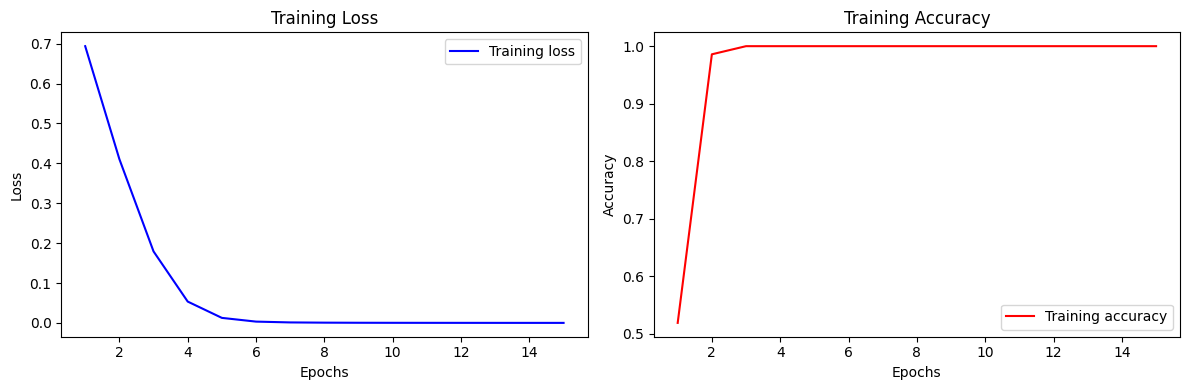

In [ ]:
loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(loss) + 1)

# Plotting the loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(x_hold)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
y_pred_prob.shape

(91, 1)

In [ ]:
threshold = 0.6

# Convert probabilities to class labels
y_pred_class = (y_pred_prob >= threshold).astype(int)

In [ ]:
accuracy = np.mean(y_pred_class == y_hold.reshape(-1, 1))
accuracy

0.7472527472527473

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_hold, y_pred_class)

In [ ]:
cm

array([[45,  2],
       [21, 23]])

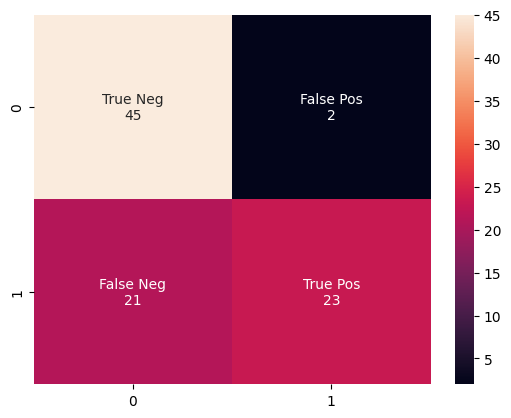

In [ ]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt='');
#Left side is actual labels and the one at the bottom predicted

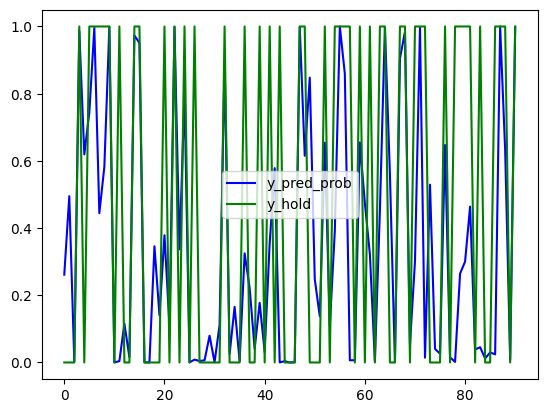

In [ ]:
plt.plot(y_pred_prob, label='y_pred_prob', color='blue')
plt.plot(y_hold, label='y_hold', color='green');
plt.legend();

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_hold, y_pred_class)
recall = recall_score(y_hold, y_pred_class)
f1 = f1_score(y_hold, y_pred_class)
roc_auc = roc_auc_score(y_hold, y_pred_prob)

In [ ]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Precision: 0.9200
Recall: 0.5227
F1 Score: 0.6667
ROC AUC: 0.8211
